### R for bio

Followed by: Introduction to phylogenetics using R:<br>
http://adegenet.r-forge.r-project.org/files/MSc-intro-phylo.1.1.pdf

##### Basic components:

stats: basic hierarchical clustering routines,<br>
ade4, adegenet: for graphics,<br>
ape: the core package for phylogenetics,<br>
phangorn: parsimony and likelihood-based method<br>

In [1]:
library(stats)
library(ade4)
library(ape)
library(adegenet)
library(phangorn)

Warning message:
“package ‘ade4’ was built under R version 3.6.2”Warning message:
“package ‘ape’ was built under R version 3.6.3”Warning message:
“package ‘adegenet’ was built under R version 3.6.3”Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'spdep':
  method   from
  plot.mst ape 

   /// adegenet 2.1.3 is loaded ////////////

   > overview: '?adegenet'
   > tutorials/doc/questions: 'adegenetWeb()' 
   > bug reports/feature requests: adegenetIssues()



Attaching package: ‘phangorn’

The following object is masked from ‘package:adegenet’:

    AICc



##### For `.fasta`

In [1]:
# help(fasta2DNAbin)


In [3]:
dna <- fasta2DNAbin(file="http://adegenet.r-forge.r-project.org/files/usflu.fasta")


 Converting FASTA alignment into a DNAbin object... 


 Finding the size of a single genome... 


 genome size is: 1,701 nucleotides 

( 30  lines per genome )

 Importing sequences... 
........................................................................................................................................................................................................................................................................................................................................................................
 Forming final object... 

...done.



Used `DNAabin` object that used bytes for storing seq's:

In [4]:
dna

80 DNA sequences in binary format stored in a matrix.

All sequences of same length: 1701 

Labels:
CY013200
CY013781
CY012128
CY013613
CY012160
CY012272
...

Base composition:
    a     c     g     t 
0.335 0.200 0.225 0.239 
(Total: 136.08 kb)

In [5]:
class(dna)

[1] "DNAbin"

In [6]:
as.character(dna)[1:5,1:10]

CY013200,a,t,g,a,a,g,a,c,t,a
CY013781,a,t,g,a,a,g,a,c,t,a
CY012128,a,t,g,a,a,g,a,c,t,a
CY013613,a,t,g,a,a,g,a,c,t,a
CY012160,a,t,g,a,a,g,a,c,t,a


In [7]:
# coded as raw bytes:
unclass(dna)[1:5,1:10]

CY013200,88,18,48,88,88,48,88,28,18,88
CY013781,88,18,48,88,88,48,88,28,18,88
CY012128,88,18,48,88,88,48,88,28,18,88
CY013613,88,18,48,88,88,48,88,28,18,88
CY012160,88,18,48,88,88,48,88,28,18,88


In [8]:
typeof(unclass(dna)[1:5,1:10])

[1] "raw"

In [9]:
# results in savings memory to represent the data:
object.size(as.character(dna))/object.size(dna)

7.7 bytes

##### Annotation:

In [10]:
annot <- read.csv("http://adegenet.r-forge.r-project.org/files/usflu.annot.csv",
                    header=TRUE, row.names=1)
head(annot)

accession,year,misc
CY013200,1993,(A/New York/783/1993(H3N2))
CY013781,1993,(A/New York/802/1993(H3N2))
CY012128,1993,(A/New York/758/1993(H3N2))
CY013613,1993,(A/New York/766/1993(H3N2))
CY012160,1993,(A/New York/762/1993(H3N2))
CY012272,1994,(A/New York/729/1994(H3N2))


In [11]:
dim(dna)
dim(annot)

[1]   80 1701

[1] 80  3

80 isolates (5 per year) typed for the same 1701
nucleotides:

In [12]:
table(annot$year)


1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 
   5    5    5    5    5    5    5    5    5    5    5    5    5    5    5    5 

### Distance-based phylogenies:

##### Computing genetic distances

In [13]:
D <- dist.dna(dna, model="TN93")

In [14]:
class(D)
length(D)

[1] "dist"

[1] 3160

class `dist` which contains the distances between every pairs of sequences:

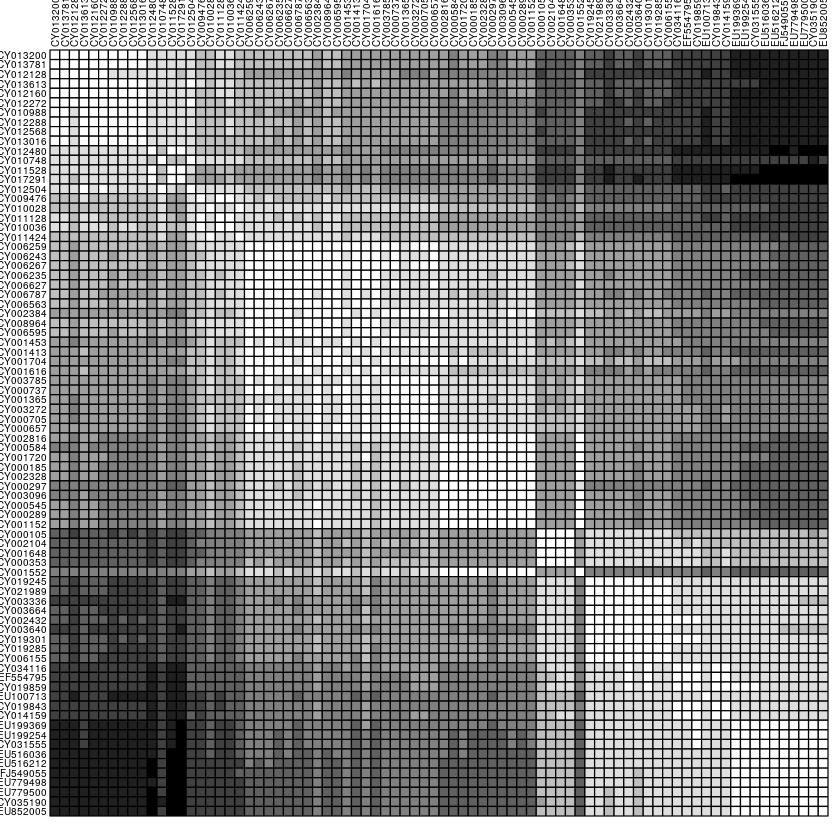

In [15]:
temp <- as.data.frame(as.matrix(D))
table.paint(temp, cleg=0, clabel.row=.5, clabel.col=.5)

Darker shades of grey represent greater distances.

as image:

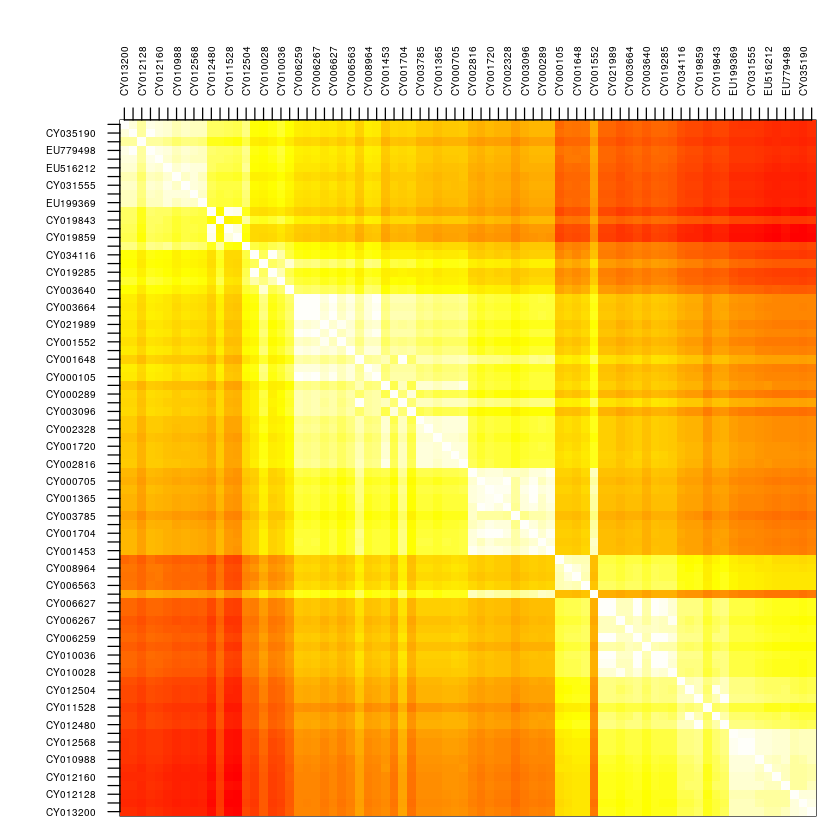

In [16]:
temp <- t(as.matrix(D))
temp <- temp[,ncol(temp):1]

par(mar=c(1,5,5,1))
image(x=1:80, y=1:80, temp, col=rev(heat.colors(100)), xaxt="n", yaxt="n",
xlab="",ylab="")
axis(side=2, at=1:80, lab=rownames(dna), las=2, cex.axis=.5)
axis(side=3, at=1:80, lab=rownames(dna), las=3, cex.axis=.5)

##### Building trees

Algorithms for tree in R:<br>
nj (ape package): the classical Neighbor-Joining algorithm. <br>
bionj (ape): an improved version of Neighbor-Joining. <br>
fastme.bal and fastme.ols (ape): minimum evolution algorithms. <br>
hclust (stats): classical hierarchical clustering algorithms including single
linkage, complete linkage, UPGMA, and others.

In [17]:
tre <- nj(D)
class(tre)
tre <- ladderize(tre)
tre

[1] "phylo"


Phylogenetic tree with 80 tips and 78 internal nodes.

Tip labels:
	CY013200, CY013781, CY012128, CY013613, CY012160, CY012272, ...

Unrooted; includes branch lengths.

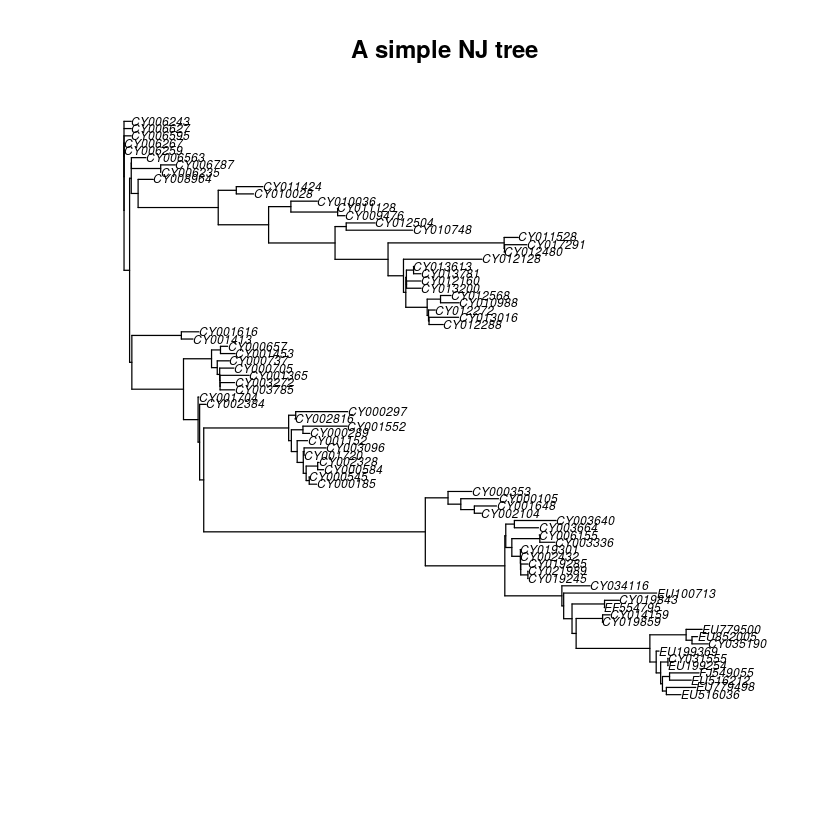

In [18]:
plot(tre, cex=.6)
title("A simple NJ tree")

In [19]:
# for reading tree see
?read.tree

# for plotting tree:
?plot.phylo

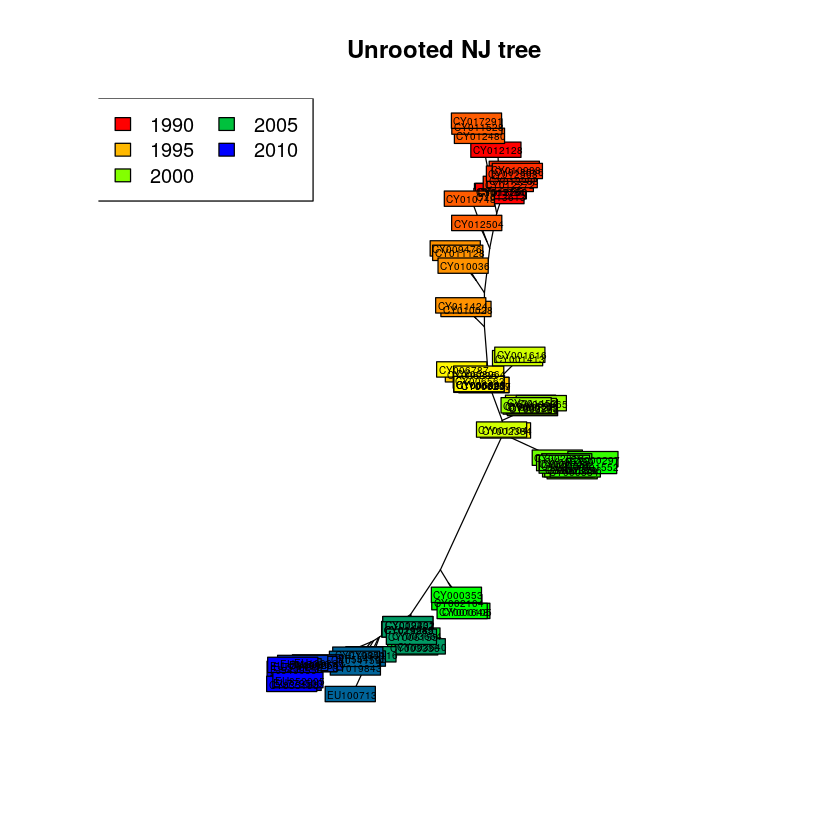

In [20]:
# plot as unruted tree:
plot(tre, type="unrooted", show.tip=FALSE)
title("Unrooted NJ tree")
myPal <- colorRampPalette(c("red","yellow","green","blue"))
tiplabels(tre$tip.label, bg=num2col(annot$year, col.pal=myPal), cex=.5)
temp<- pretty(1993:2008, 5)
legend("topleft", fill=num2col(temp, col.pal=myPal), leg=temp, ncol=2)

In [21]:
?root

In [22]:
# root tree around first node:
tre2 <- root(tre, out=1)
tre2 <- ladderize(tre2)

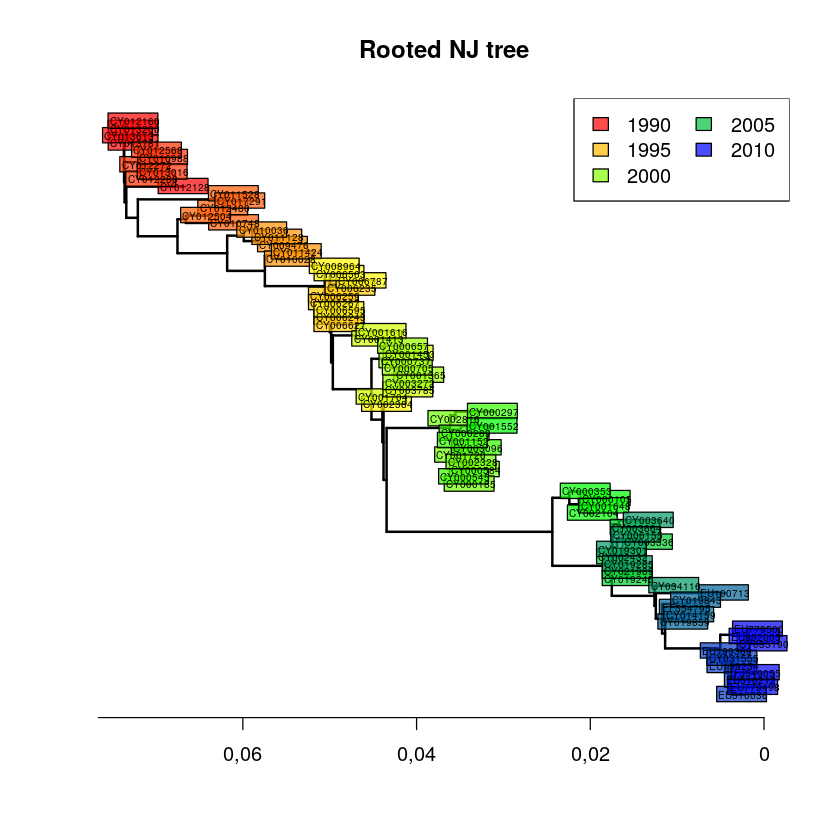

In [23]:
plot(tre2, show.tip=FALSE, edge.width=2)
title("Rooted NJ tree")
tiplabels(tre$tip.label, bg=transp(num2col(annot$year, col.pal=myPal),.7), cex=.5,
fg="transparent")
axisPhylo()
temp <- pretty(1993:2008, 5)
legend("topright", fill=transp(num2col(temp, col.pal=myPal),.7), leg=temp, ncol=2)

In [24]:
mutFromRoot <- as.matrix(dist.dna(dna, model="N"))[1,]
yearFromRoot <- annot$year-annot$year[1]

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
lm(formula = mutFromRoot ~ -1 + yearFromRoot)

Residuals:
    Min      1Q  Median      3Q     Max 
-12,327  -1,577   1,004   6,386  13,000 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
yearFromRoot  7,73274    0,07443   103,9   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 5,86 on 79 degrees of freedom
Multiple R-squared:  0,9927,	Adjusted R-squared:  0,9926 
F-statistic: 1,079e+04 on 1 and 79 DF,  p-value: < 2,2e-16


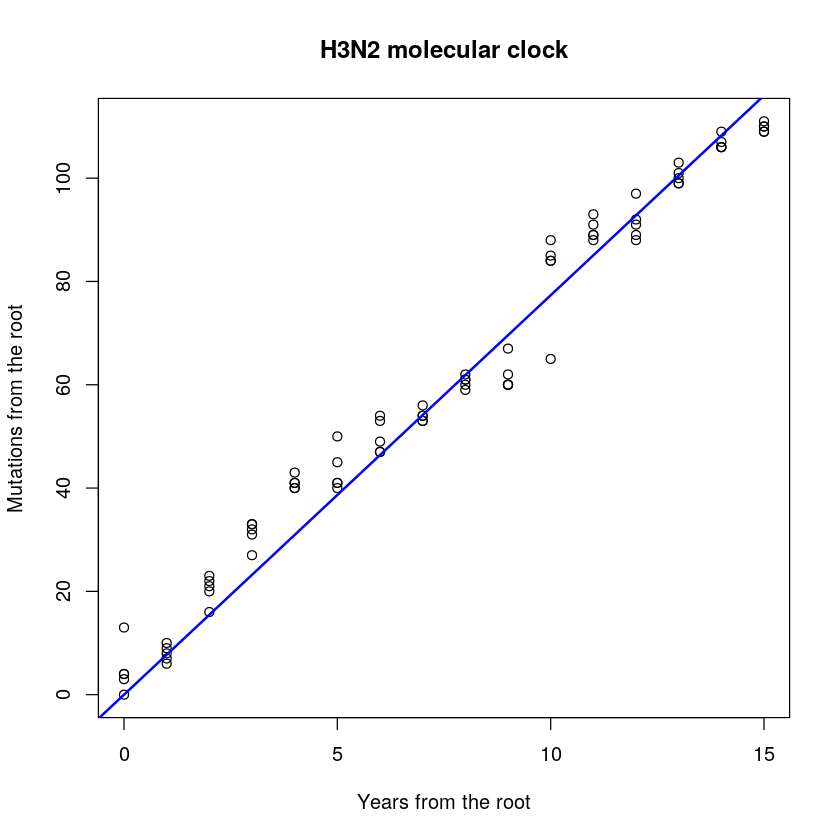

In [25]:
plot(mutFromRoot~yearFromRoot, xlab="Years from the root",
ylab="Mutations from the root", main="H3N2 molecular clock")
lm.clock <- lm(mutFromRoot~-1+yearFromRoot)
abline(lm.clock, col="blue",lwd=2)
summary(lm.clock)

In [42]:
# https://en.wikipedia.org/wiki/Cophenetic_correlation
?cophenetic

[1] 0,9975154

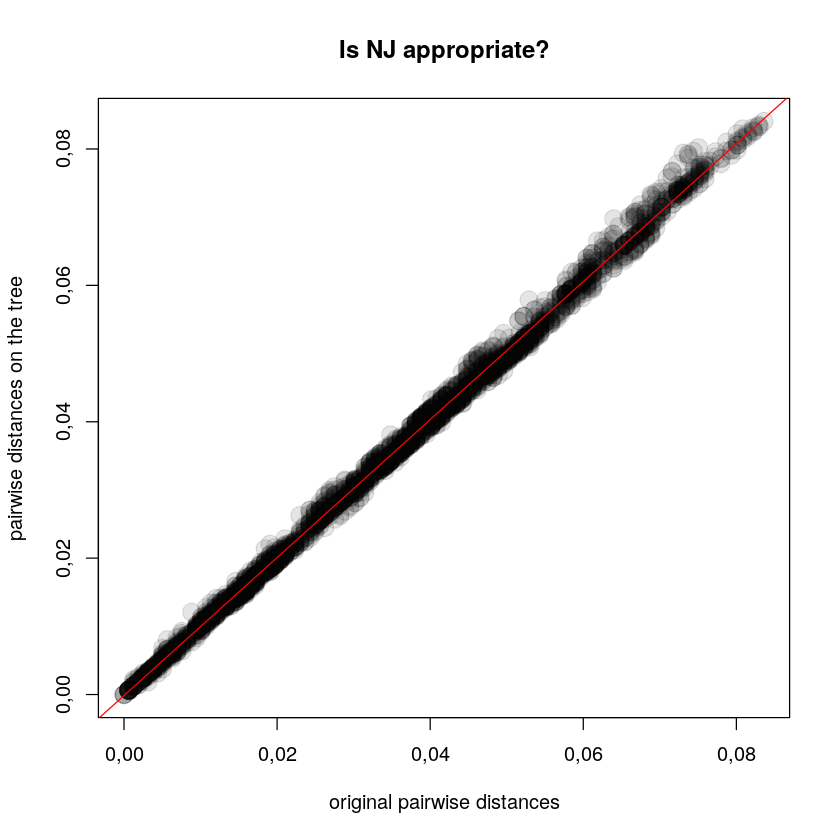

In [26]:
x <- as.vector(D)
y <- as.vector(as.dist(cophenetic(tre2)))
plot(x, y, xlab="original pairwise distances", ylab="pairwise distances on the tree",
main="Is NJ appropriate?", pch=20, col=transp("black",.1), cex=3)
abline(lm(y~x), col="red")
cor(x,y)^2

for Neighbor-Joining tree

[1] 0,7393009

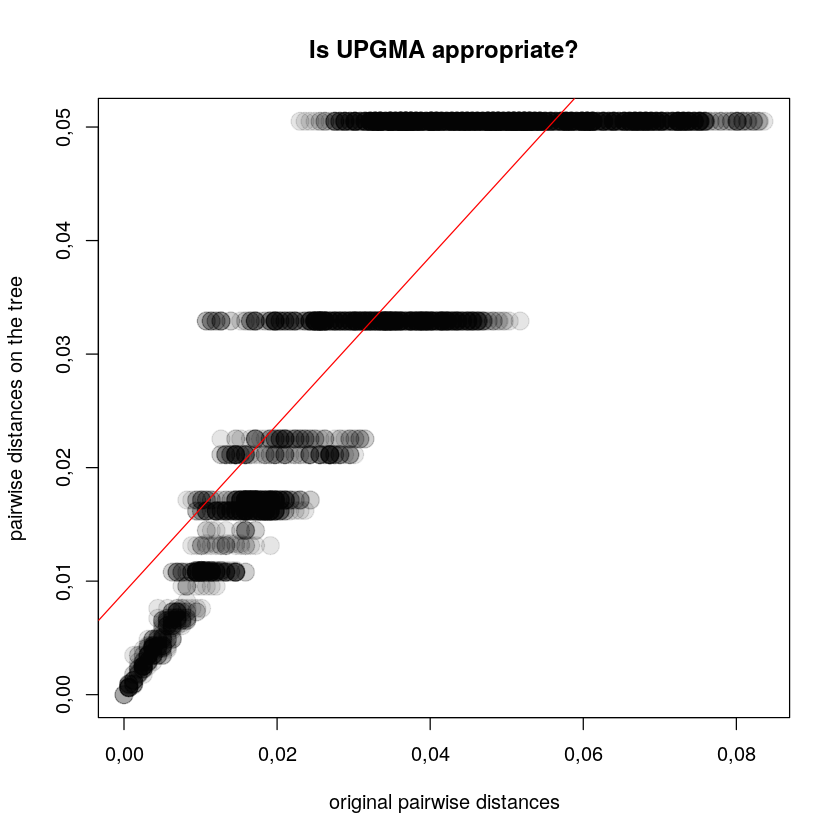

In [27]:
tre3 <- as.phylo(hclust(D,method="average"))
y <- as.vector(as.dist(cophenetic(tre3)))
plot(x, y, xlab="original pairwise distances", ylab="pairwise distances on the tree",
main="Is UPGMA appropriate?", pch=20, col=transp("black",.1), cex=3)
abline(lm(y~x), col="red")
cor(x,y)^2

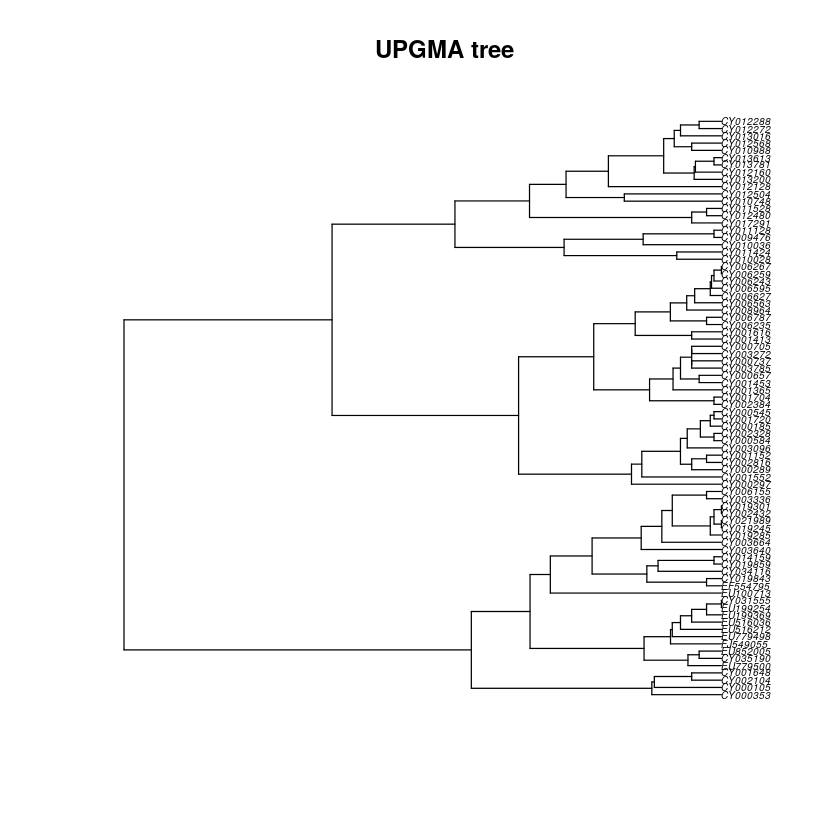

In [28]:
plot(tre3, cex=.5)
title("UPGMA tree")

In [29]:
?boot.phylo

In [30]:
# last arg - func for calculating tree from data
# (use jn an rerooting to node 1): 
myBoots <- boot.phylo(tre2, dna, function(e) root(nj(dist.dna(e, model = "TN93")),1))
myBoots

Running bootstraps:       100 / 100
Calculating bootstrap values... done.


[1] 100  23  24  20  62  37  57  35  50 100 100  78  23  49  97  66  38  31  18
[20]  83  98 100  38  82  38  73  50  92  29  49  70  99  97  98 100  97 100 100
[39]  93  80  65  53  21  68  91  42  40  81 100  97  89  80 100  39  65  68  92
[58]  32  41  66 100 100  48  52  30  93 100 100  53  54  32  36  59  54  94  56
[77] 100  68

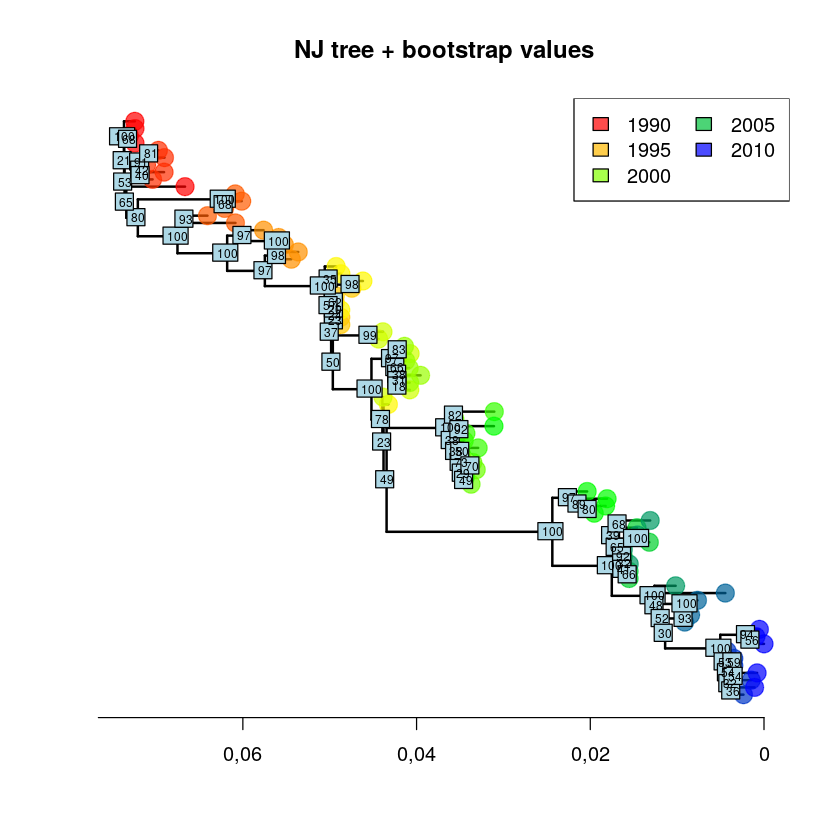

In [31]:
plot(tre2, show.tip=FALSE, edge.width=2)
title("NJ tree + bootstrap values")
tiplabels(frame="none", pch=20, col=transp(num2col(annot$year, col.pal=myPal),.7),

cex=3, fg="transparent")
axisPhylo()
temp <- pretty(1993:2008, 5)
legend("topright", fill=transp(num2col(temp, col.pal=myPal),.7), leg=temp, ncol=2)
nodelabels(myBoots, cex=.6)

remove poorly supported nodes:

In [32]:
temp <- tre2
N <- length(tre2$tip.label)
toCollapse <- match(which(myBoots<70)+N, temp$edge[,2])
temp$edge.length[toCollapse] <- 0
tre3 <- di2multi(temp, tol=0.00001)

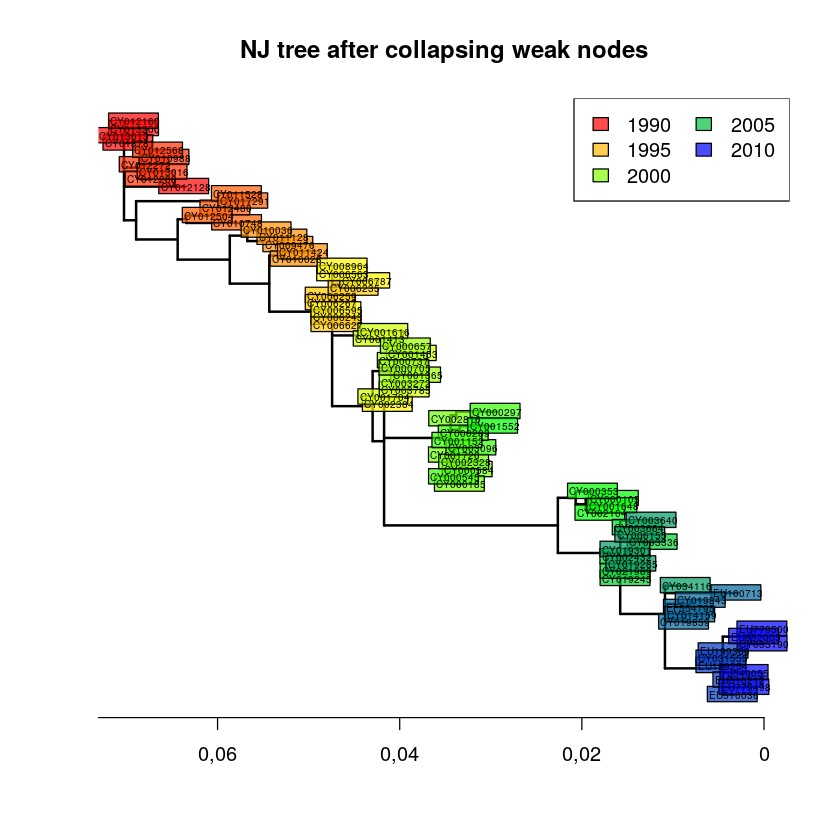

In [33]:
plot(tre3, show.tip=FALSE, edge.width=2)
title("NJ tree after collapsing weak nodes")
tiplabels(tre3$tip.label, bg=transp(num2col(annot$year, col.pal=myPal),.7), cex=.5,
fg="transparent")
axisPhylo()
temp <- pretty(1993:2008, 5)
legend("topright", fill=transp(num2col(temp, col.pal=myPal),.7), leg=temp, ncol=2)

In [ ]:
# y <- as.vector(as.dist(cophenetic(tre3)))
# plot(x, y, xlab="original pairwise distances", ylab="pairwise distances on the tree",
# main="Is UPGMA appropriate?", pch=20, col=transp("black",.1), cex=3)
# abline(lm(y~x), col="red")
# cor(x,y)^2

### Maximum parsimony phylogenies

In [34]:
dna2 <- as.phyDat(dna)
class(dna2)

[1] "phyDat"

init tree:

In [35]:
tree1.ini <- nj(dist.dna(dna,model="raw"))
tree1.ini


Phylogenetic tree with 80 tips and 78 internal nodes.

Tip labels:
	CY013200, CY013781, CY012128, CY013613, CY012160, CY012272, ...

Unrooted; includes branch lengths.

parsimony:

In [40]:
parsimony(tree1.ini, dna2)

[1] 422

In [37]:
?parsimony

In [42]:
tree1.pars <- optim.parsimony(tree1.ini, dna2)

Final p-score 420 after  2 nni operations 


In [43]:
tree1.pars


Phylogenetic tree with 80 tips and 76 internal nodes.

Tip labels:
	CY013200, CY013781, CY012128, CY013613, CY012160, CY012272, ...

Unrooted; no branch lengths.

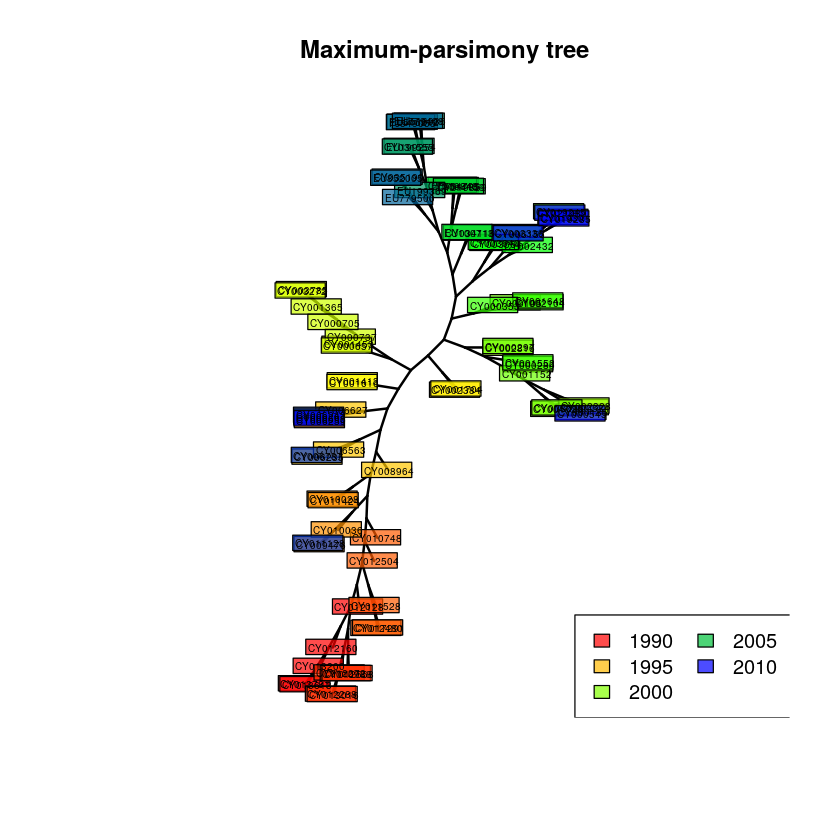

In [46]:
plot(tree1.pars, type="unr", show.tip=FALSE, edge.width=2)
title("Maximum-parsimony tree")
tiplabels(tree1.pars$tip.label, bg=transp(num2col(annot$year, col.pal=myPal),.7), cex=.5,
fg="transparent")
temp <- pretty(1993:2008, 5)
legend("bottomright", fill=transp(num2col(temp, col.pal=myPal),.7), leg=temp, ncol=2,
bg=transp("white"))

### Maximum likelihood phylogenies

In [47]:
dna2 <- as.phyDat(dna)
class(dna2)

[1] "phyDat"

In [48]:
tree2.ini <- nj(dist.dna(dna,model="TN93"))
tree2.ini


Phylogenetic tree with 80 tips and 78 internal nodes.

Tip labels:
	CY013200, CY013781, CY012128, CY013613, CY012160, CY012272, ...

Unrooted; includes branch lengths.

initial fit for model:

In [49]:
pml(tree2.ini, dna2, k=4)

negative edges length changed to 0!



 loglikelihood: -5641,785 

unconstrained loglikelihood: -4736,539 
Discrete gamma model
Number of rate categories: 4 
Shape parameter: 1 

Rate matrix:
  a c g t
a 0 1 1 1
c 1 0 1 1
g 1 1 0 1
t 1 1 1 0

Base frequencies:  
0,25 0,25 0,25 0,25 

In [50]:
# loglikelihood wrong because of missing data:
table(as.character(dna2))


    -     a     c     g     k     m     r     s     t     w 
  147 45595 27170 30613     1     2     1     1 32549     1 

remove missing data:

In [51]:
# retruve positions of missed data:
na.posi <- which(apply(as.character(dna),2, function(e) any(!e %in% c("a","t","g","c"))))
                       
temp <- apply(as.character(dna),2, function(e) sum(!e %in% c("a","t","g","c")))
# plot(temp, type="l", col="blue", xlab="Position in HA segment", ylab="Number of NAs")

# fixing:
dna3 <- dna[,-na.posi]
dna3
              
table(as.character(dna3))
              
# transform for phyDat:
dna4 <- as.phyDat(dna3)

80 DNA sequences in binary format stored in a matrix.

All sequences of same length: 1596 

Labels:
CY013200
CY013781
CY012128
CY013613
CY012160
CY012272
...

Base composition:
    a     c     g     t 
0,340 0,197 0,226 0,238 
(Total: 127,68 kb)


    a     c     g     t 
43402 25104 28828 30346 

reinit model

In [52]:
dna4 <- as.phyDat(dna3)
tre.ini <- nj(dist.dna(dna3,model="TN93"))
fit.ini <- pml(tre.ini, dna4, k=4)
fit.ini

negative edges length changed to 0!



 loglikelihood: -5184,119 

unconstrained loglikelihood: -4043,367 
Discrete gamma model
Number of rate categories: 4 
Shape parameter: 1 

Rate matrix:
  a c g t
a 0 1 1 1
c 1 0 1 1
g 1 1 0 1
t 1 1 1 0

Base frequencies:  
0,25 0,25 0,25 0,25 

seeking a maximum likelihood solution:

In [53]:
# optimize tree topology (optNni=TRUE),
# base frequencies (optBf=TRUE),
# the rates of all possible subtitutions (optQ=TRUE),
# use a gamma distribution to model variation in
#    the substitution rates across sites (optGamma=TRUE):
fit <- optim.pml(fit.ini, optNni=TRUE, optBf=TRUE, optQ=TRUE, optGamma=TRUE)
fit


optimize edge weights:  -5184,119 --> -5166,996 
optimize base frequencies:  -5166,996 --> -5121,313 
optimize rate matrix:  -5121,313 --> -4933,871 
optimize shape parameter:  -4933,871 --> -4919,646 
optimize edge weights:  -4919,646 --> -4919,326 
optimize topology:  -4919,326 --> -4916,186 
optimize topology:  -4916,186 --> -4916,186 
2 
optimize base frequencies:  -4916,186 --> -4915,89 
optimize rate matrix:  -4915,89 --> -4915,867 
optimize shape parameter:  -4915,867 --> -4915,867 
optimize edge weights:  -4915,867 --> -4915,867 
optimize topology:  -4915,867 --> -4915,867 
0 
optimize base frequencies:  -4915,867 --> -4915,866 
optimize rate matrix:  -4915,866 --> -4915,866 
optimize shape parameter:  -4915,866 --> -4915,866 
optimize edge weights:  -4915,866 --> -4915,866 
optimize base frequencies:  -4915,866 --> -4915,866 
optimize rate matrix:  -4915,866 --> -4915,866 
optimize shape parameter:  -4915,866 --> -4915,866 
optimize edge weights:  -4915,866 --> -4915,866 



 loglikelihood: -4915,866 

unconstrained loglikelihood: -4043,367 
Discrete gamma model
Number of rate categories: 4 
Shape parameter: 0,2818204 

Rate matrix:
          a          c         g          t
a 0,0000000  2,3834849 8,2965188  0,8563995
c 2,3834849  0,0000000 0,1485422 10,0794126
g 8,2965188  0,1485422 0,0000000  1,0000000
t 0,8563995 10,0794126 1,0000000  0,0000000

Base frequencies:  
0,3415991 0,1953602 0,2243303 0,2387104 

`a g` and `c t` is most often happend

Comparing results:

In [54]:
anova(fit.ini, fit)

Log lik.,Df,Df change,Diff log lik.,Pr(>|Chi|)
"-5184,119",158,NA,NA,NA
"-4915,866",166,8,"536,5065","1,026678e-110"


In [55]:
AIC(fit.ini)
AIC(fit)

[1] 10684,24

[1] 10163,73

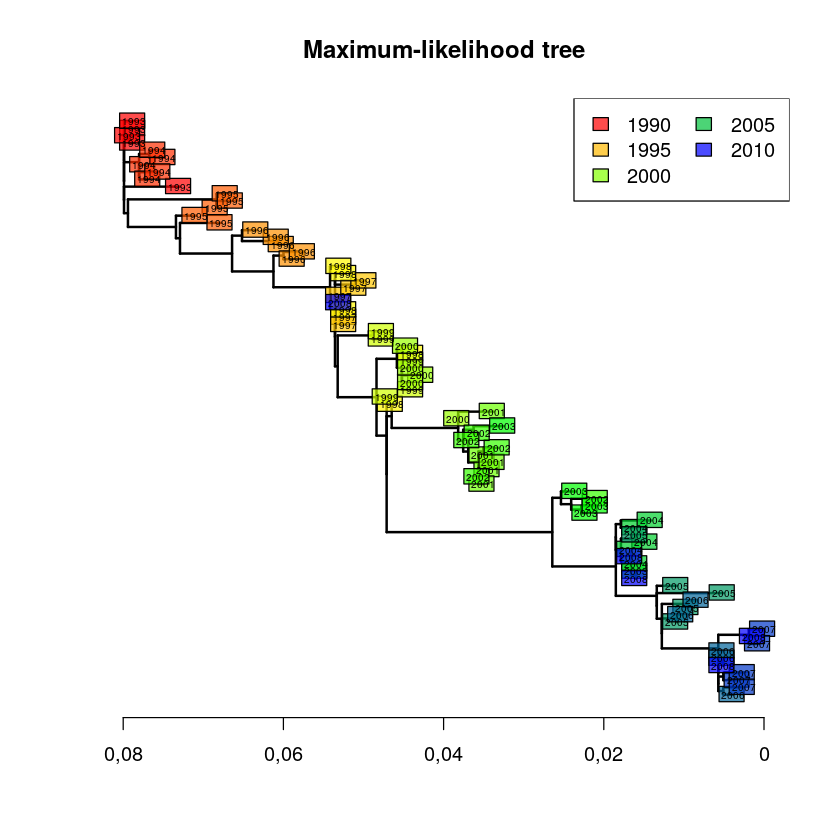

In [56]:
tre4 <- root(fit$tree,1)
tre4 <- ladderize(tre4)
plot(tre4, show.tip=FALSE, edge.width=2)
title("Maximum-likelihood tree")
tiplabels(annot$year, bg=transp(num2col(annot$year, col.pal=myPal),.7), cex=.5,
fg="transparent")
axisPhylo()
temp <- pretty(1993:2008, 5)
legend("topright", fill=transp(num2col(temp, col.pal=myPal),.7), leg=temp, ncol=2)